In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [90]:
url = '../Datasets/bill_authentication.csv'
bill = pd.read_csv(url, sep = ",")
bill

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
bill.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
bill['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

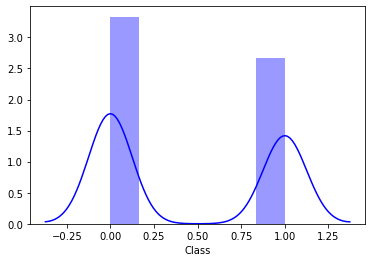

In [10]:
sns.distplot(bill['Class'], color='blue', kde=True);

In [7]:
bill.isna().any()

Variance    False
Skewness    False
Curtosis    False
Entropy     False
Class       False
dtype: bool

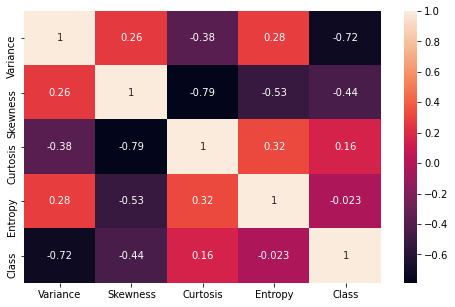

In [18]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(bill.corr(), annot = True)

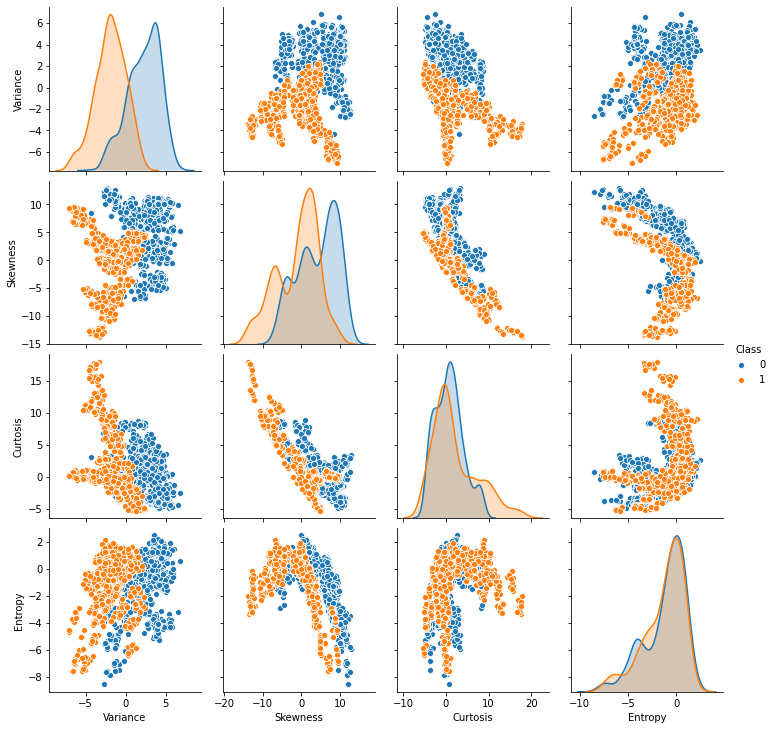

In [19]:
sns.pairplot(bill, hue='Class');

<h3>Preparing Data Model</h3>

In [91]:
X = bill.drop('Class', axis=1)
X

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [92]:
y = bill['Class']
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [94]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [95]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0).fit(X_train, y_train)

In [96]:
y_pred = clf.predict(X_test)

<h3>Accuracy</h3>

In [97]:
scores = cross_val_score(estimator = clf, X = X_train, y = y_train, cv=10)
print("Accuracies:\n", scores)

Accuracies:
 [0.98958333 0.97916667 1.         0.98958333 0.98958333 0.98958333
 0.98958333 0.96875    0.96875    0.95833333]


In [98]:
print("mean cross validation score: {}".format(np.mean(scores)))

mean cross validation score: 0.9822916666666668


In [99]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.9757


In [100]:
print("R2 Score:\t", r2_score(y_test, y_pred))

R2 Score:	 0.9009496333693954


In [101]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9757


<h3>Classification Report</h3>

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       235
           1       0.95      0.99      0.97       177

    accuracy                           0.98       412
   macro avg       0.97      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



<h3>Confusion Matrix</h3>

In [103]:
cfm = confusion_matrix(y_test, y_pred, labels=[0,1])
cf_dataframe = pd.DataFrame(cfm, index=[i for i in [0,1]], columns=[i for i in ['predicted 0','predicted 1']])
cf_dataframe

,predicted 0,predicted 1
0,226,9
1,1,176


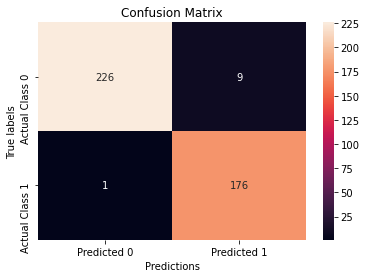

In [104]:
ax = plt.subplot()
sns.heatmap(cfm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predictions');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Predicted 0', 'Predicted 1']); 
ax.yaxis.set_ticklabels(['Actual Class 0', 'Actual Class 1']);

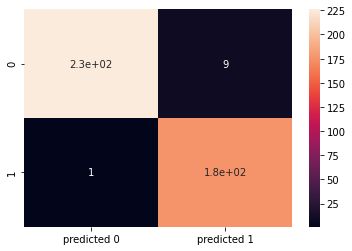

In [105]:
sns.heatmap(cf_dataframe, annot=True)

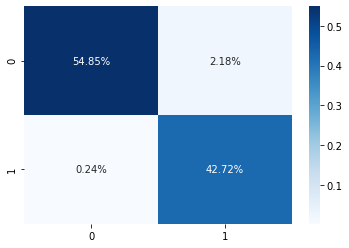

In [106]:
sns.heatmap(cfm/np.sum(cfm), annot=True, fmt='.2%', cmap='Blues')